In [1]:
"""This workbook will cover tackling the credit card fraud dataset @https://www.kaggle.com/mlg-ulb/creditcardfraud/download
This will cover several parts:
1. Data Exploration and Data Cleaning
2. Modeling and Evaluating without Resampling
3. Resampling
4. Modeling
5. Evaluationw

It is important to read the dataset description on Kaggle, especially for this set:
"It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to 
confidentiality issues, we cannot provide the original features and more background information about the data. 
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed 
with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first 
transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant 
cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise."
"""

'This workbook will cover tackling the credit card fraud dataset @https://www.kaggle.com/mlg-ulb/creditcardfraud/download\nThis will cover several parts:\n1. Data Exploration and Data Cleaning\n2. Modeling and Evaluating without Resampling\n3. Resampling\n4. Modeling\n5. Evaluationw\n\nIt is important to read the dataset description on Kaggle, especially for this set:\n"It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to \nconfidentiality issues, we cannot provide the original features and more background information about the data. \nFeatures V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed \nwith PCA are \'Time\' and \'Amount\'. Feature \'Time\' contains the seconds elapsed between each transaction and the first \ntransaction in the dataset. The feature \'Amount\' is the transaction Amount, this feature can be used for example-dependant \ncost-senstive learning. F

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

"Data set is pretty clean, the classes are already binary, the features are pretty standard and close together, \nthere is little need for much preprocessing, let's just scale the data.\n"

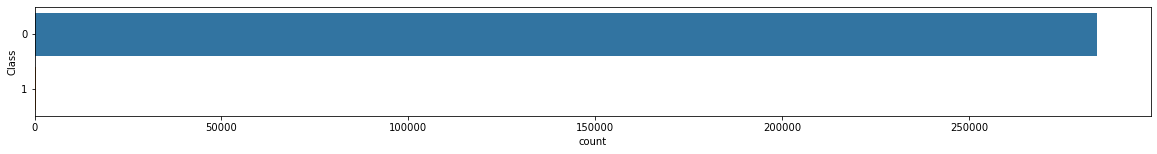

In [2]:
#1. Data Exploration and Data Cleaning
from pandas import read_csv
from numpy import array
from matplotlib import pyplot
import seaborn
from sklearn.preprocessing import StandardScaler

#load csv
data = read_csv('creditcard.csv')

#peak at data
print(data.head()) 

#use df.describe
print(data.describe(include='all'))

#plot the classes and view the imbalance.
pyplot.figure(figsize=(20,2))
seaborn.countplot(y=data['Class'])


#pre-processing
data = data.drop(['Time'], axis = 1)

X = array(data.loc[:, data.columns != 'Class'])
y = array(data.loc[:, data.columns == 'Class']).reshape(-1, 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X)
"""Data set is pretty clean, the classes are already binary, the features are pretty standard and close together, 
there is little need for much preprocessing, let's just scale the data.
"""

In [ ]:
#2. Modeling and Evaluating without Resampling
"""Below we will be creating a LogisticRegression model with the data as is, as a control model of sorts.
"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y)
model = LogisticRegression(solver='liblinear')
model.fit(trainX, trainy.ravel())
yhat = model.predict(testX)

print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

"""As expected we have a very high accuracy, but the precision and recall say otherwise. 
"""

In [ ]:
#2. Resampling
"""We can see from the performance above that the model wasn't all that great. And as expected it is because the data is
very unbalanced. Below we will view the data again and use the SMOTEENN method to resample the data to improve balance. 
NOTE: This takes some time to complete.
"""

# We know this is an imbalanced dataset, so let's see how imbalanced.
print('% breakdown:')
print(data['Class'].value_counts() / len(data))

# above we can see that our data is 99.8273% non-fraud cases. This means that probably any classifier would score pretty 
# well by simply marking every case as non-fraudulent.

from imblearn.combine import SMOTEENN

# define sampling strategy
sample = SMOTEENN(sampling_strategy=0.25)

# fit and apply the transform
X_smoteenn, y_smoteenn = sample.fit_resample(X, y)

# summarize class distribution
print('Resampled % breakdown:')
print(y_smoteenn / len(y_smoteenn))


In [ ]:
#3. Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

trainX, testX, trainy, testy = train_test_split(X_smoteenn, y_smoteenn, test_size=0.5, stratify=y_smoteenn)
model = LogisticRegression(solver='liblinear')
model.fit(trainX, trainy)
yhat = model.predict(testX)

In [ ]:
#4. Evaluation
"""We will look at some run-of-the-mill evauluation, and then an evaluation using the Fbeta-measure."""
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

from sklearn.metrics import fbeta_score
print('Fbeta-measure(beta=1): %.3f' % fbeta_score(testy, yhat, beta=1))
print('Fbeta-measure(beta=0.5): %.3f' % fbeta_score(testy, yhat, beta=0.5))
print('Fbeta-measure(beta=2): %.3f' % fbeta_score(testy, yhat, beta=2))

In [3]:
# An Appendix of sorts
"""I read an article that said decision tree style classifiers do a pretty good job on imbalanced data, so I thought I'd add
this on so we could find out. 
"""
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y)
model = RandomForestClassifier()
model.fit(trainX, trainy.ravel())
yhat = model.predict(testX)

print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

"""So as we can see, it did a pretty good job, the recall is good, and with some tuning, this might be a decent way to tackle
an imbalanced dataset. 
"""

Accuracy: 1.000
Precision: 0.952
Recall: 0.801
F-measure: 0.870
